In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
import os
import sys

In [3]:
# load the two files 
resdir = '/scratch/aew492/quasars/quaia_PS'
res_linsyst = np.load(os.path.join(resdir, f'G20.0_selfunc50_remove_dipole_True_linsyst_alltemplates.pkl'), allow_pickle=True)
res = np.load(os.path.join(resdir, f'G20.0_selfunc50_remove_dipole_True.pkl'), allow_pickle=True)

In [4]:
# unpack: each "res" is a dict where the only keys are 'qml' and 'nmt'
qml_linsyst = res_linsyst['qml']
nmt_linsyst = res_linsyst['nmt']
qml = res['qml']
nmt = res['nmt']

In [5]:
# qml
print(qml.keys(), qml_linsyst.keys())
# we're interested in the data
qml['diagk_corrg']['data'].keys()

dict_keys(['diagk_corrg', 'data_format', 'lb', 'lbounds', 'dell', 'monopole_dipole']) dict_keys(['diagk_corrg', 'diagk_corrg_bink', 'data_format', 'lb', 'lbounds', 'dell', 'monopole_dipole'])


dict_keys([('k', 'k'), ('k_debias', 'k_debias'), ('g_sel', 'g_sel'), ('g_sel_debias', 'g_sel_debias'), ('k', 'g_sel'), ('g1_sel', 'g2_sel'), ('g1_sel', 'g1_sel'), ('g2_sel', 'g2_sel'), ('k', 'gjk_sel'), ('gjk_sel', 'gjk_sel'), ('gjk_sel_debias', 'gjk_sel_debias')])

- `('g_sel','g_sel')` gives the autospectrum of the map which has signal (David's blue curve + systematics) and shot noise due to a finite number of quasars (this is the flat spectrum at high $\ell$)

- So to match the theory curve we can also try `< g_signal g_signal > ~= < g g > - < gjk gjk >`

In [6]:
# unpack ell and the auto powers gg
ell_linsyst_qml = qml_linsyst['lb']
gselgsel_linsyst_qml = qml_linsyst['diagk_corrg']['data'][('g_sel','g_sel')]
ell_qml = qml['lb']
gselgsel_qml = qml['diagk_corrg']['data'][('g_sel','g_sel')]
g1selg1sel_qml = qml['diagk_corrg']['data'][('g1_sel','g1_sel')]
g2selg2sel_qml = qml['diagk_corrg']['data'][('g2_sel','g2_sel')]

In [7]:
# nmt
print(nmt.keys(), nmt_linsyst.keys())
# we're interested in the data
nmt['diagk_corrg']['data'].keys()

dict_keys(['diagk_corrg', 'lb']) dict_keys(['diagk_corrg', 'diagk_corrg_bink', 'lb'])


dict_keys([('k', 'k'), ('g_sel', 'g_sel'), ('k', 'g_sel'), ('g1_sel', 'g1_sel'), ('g2_sel', 'g2_sel'), ('g1_sel', 'g2_sel'), ('k', 'gjk_sel'), ('gjk_sel', 'gjk_sel')])

In [14]:
# unpack ell and the auto powers gg
ell_linsyst_nmt = nmt_linsyst['lb']
gselgsel_linsyst_nmt = nmt_linsyst['diagk_corrg']['data'][('g_sel','g_sel')]
gjkselgjksel_linsyst_nmt = nmt_linsyst['diagk_corrg']['data'][('gjk_sel','gjk_sel')]
ell_nmt = nmt['lb']
gselgsel_nmt = nmt['diagk_corrg']['data'][('g_sel','g_sel')]
g1selg1sel_nmt = nmt['diagk_corrg']['data'][('g1_sel','g1_sel')]
g2selg2sel_nmt = nmt['diagk_corrg']['data'][('g2_sel','g2_sel')]
gjkselgjksel_nmt = nmt['diagk_corrg']['data'][('gjk_sel','gjk_sel')]

In [9]:
# nmt theory
nmt['diagk_corrg']['theory'].shape

(400, 3, 768)

In [10]:
# make sure ell and auto power have same shape
ell_nmt.shape, gselgsel_nmt.shape

((47,), (47,))

In [11]:
# load in best-fit from David
with np.load('/scratch/aew492/quasars/quaia_PS/cl_gg_bf_G20.0_1bin.npz') as res:
    ell = res['ell']
    cl_gg = res['cl_gg']

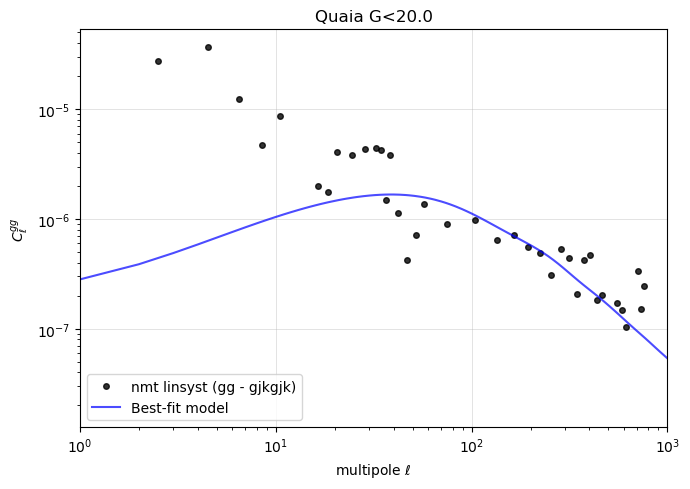

In [18]:
# plot
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)
kwargs_nmt = dict(marker='o', ms=4, ls='None', alpha=0.8)
# NaMaster
# ax.plot(ell_nmt, gselgsel_nmt, c='grey',
#         label=r'nmt', **kwargs_nmt)
ax.plot(ell_linsyst_nmt, gselgsel_linsyst_nmt - gjkselgjksel_nmt, c='k',
        label=r'nmt linsyst (gg - gjkgjk)', **kwargs_nmt)
ax.plot(ell, cl_gg, 'b-', alpha=0.7, label='Best-fit model')
ax.grid(alpha=0.5, lw=0.5)
ax.set_xlim(1,1e3)
ax.loglog()
ax.set_xlabel(r'multipole $\ell$')
ax.set_ylabel(r'$C_\ell^{gg}$')
ax.set_title(r'Quaia G<20.0')
ax.legend(loc=3)

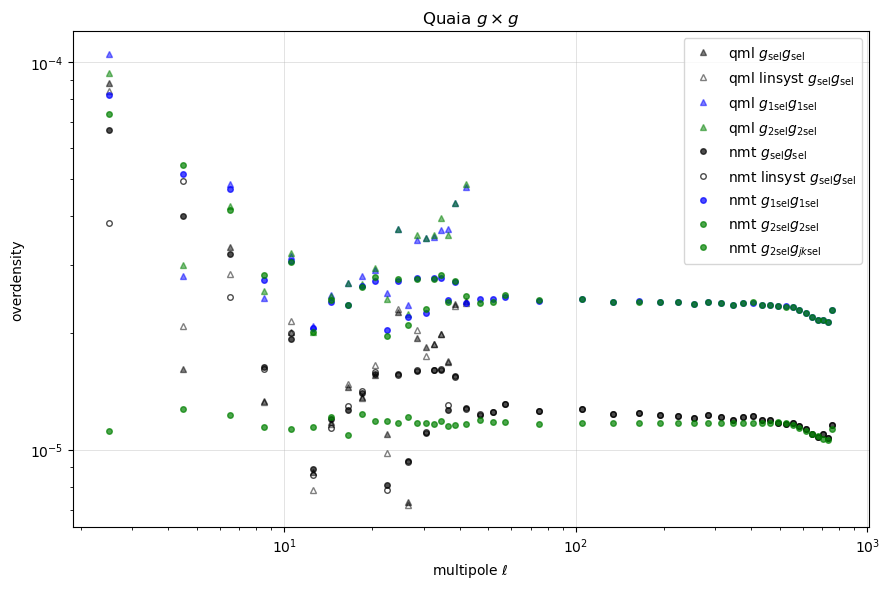

In [12]:
# plot
fig, ax = plt.subplots(figsize=(9,6), tight_layout=True)
kwargs_qml = dict(marker='^', ms=4, ls='None', alpha=0.5)
kwargs_nmt = dict(marker='o', ms=4, ls='None', alpha=0.7)
# qml
ax.plot(ell_qml, gselgsel_qml, c='k',
        label=r'qml $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_qml)
ax.plot(ell_linsyst_qml, gselgsel_linsyst_qml, c='k', fillstyle='none',
        label='qml linsyst $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_qml)
ax.plot(ell_qml, g1selg1sel_qml, c='b',
        label=r'qml $g_{1\mathrm{sel}}g_{1\mathrm{sel}}$', **kwargs_qml)
ax.plot(ell_qml, g2selg2sel_qml, c='g',
        label=r'qml $g_{2\mathrm{sel}}g_{2\mathrm{sel}}$', **kwargs_qml)
# nmt
ax.plot(ell_nmt, gselgsel_nmt, c='k',
        label=r'nmt $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_nmt)
ax.plot(ell_linsyst_nmt, gselgsel_linsyst_nmt, c='k',fillstyle='none',
        label='nmt linsyst $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_nmt)
ax.plot(ell_nmt, g1selg1sel_nmt, c='b',
        label=r'nmt $g_{1\mathrm{sel}}g_{1\mathrm{sel}}$', **kwargs_nmt)
ax.plot(ell_nmt, g2selg2sel_nmt, c='g',
        label=r'nmt $g_{2\mathrm{sel}}g_{2\mathrm{sel}}$', **kwargs_nmt)
ax.plot(ell_nmt, gjkselgjksel_nmt, c='g',
        label=r'nmt $g_{2\mathrm{sel}}g_{jk\mathrm{sel}}$', **kwargs_nmt)
ax.grid(alpha=0.5, lw=0.5)
ax.loglog()
ax.set_xlabel(r'multipole $\ell$')
ax.set_ylabel(r'overdensity')
ax.set_title(r'Quaia $g\times g$')
ax.legend()

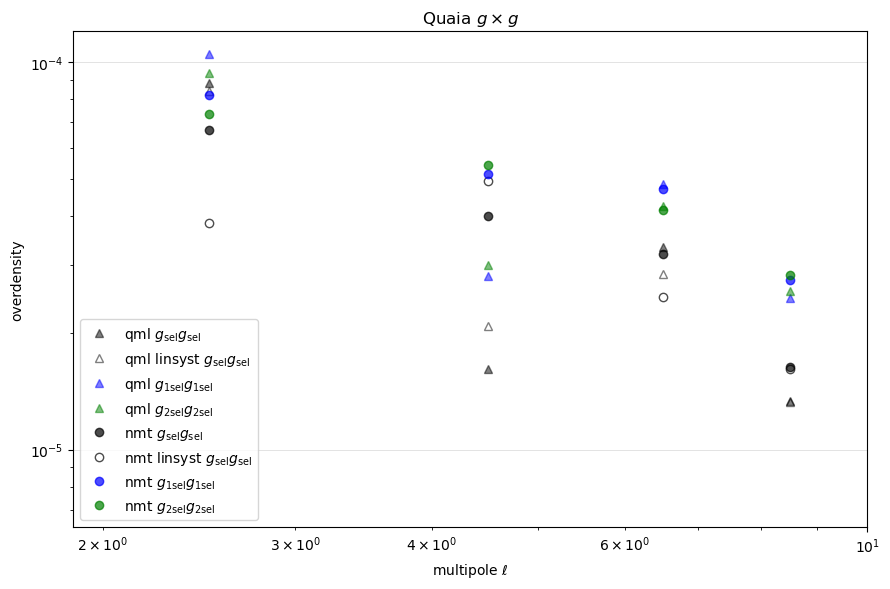

In [14]:
# zoom in on low multipoles
# plot
fig, ax = plt.subplots(figsize=(9,6), tight_layout=True)
kwargs_qml = dict(marker='^', ms=6, ls='None', alpha=0.5)
kwargs_nmt = dict(marker='o', ms=6, ls='None', alpha=0.7)
# qml
ax.plot(ell_qml, gselgsel_qml, c='k',
        label=r'qml $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_qml)
ax.plot(ell_linsyst_qml, gselgsel_linsyst_qml, c='k', fillstyle='none',
        label='qml linsyst $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_qml)
ax.plot(ell_qml, g1selg1sel_qml, c='b',
        label=r'qml $g_{1\mathrm{sel}}g_{1\mathrm{sel}}$', **kwargs_qml)
ax.plot(ell_qml, g2selg2sel_qml, c='g',
        label=r'qml $g_{2\mathrm{sel}}g_{2\mathrm{sel}}$', **kwargs_qml)
# nmt
ax.plot(ell_nmt, gselgsel_nmt, c='k',
        label=r'nmt $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_nmt)
ax.plot(ell_linsyst_nmt, gselgsel_linsyst_nmt, c='k',fillstyle='none',
        label='nmt linsyst $g_\mathrm{sel}g_\mathrm{sel}$', **kwargs_nmt)
ax.plot(ell_nmt, g1selg1sel_nmt, c='b',
        label=r'nmt $g_{1\mathrm{sel}}g_{1\mathrm{sel}}$', **kwargs_nmt)
ax.plot(ell_nmt, g2selg2sel_nmt, c='g',
        label=r'nmt $g_{2\mathrm{sel}}g_{2\mathrm{sel}}$', **kwargs_nmt)
ax.grid(alpha=0.5, lw=0.5)
ax.loglog()
ax.set_xlim(None, 10) # !!
ax.set_xlabel(r'multipole $\ell$')
ax.set_ylabel(r'overdensity')
ax.set_title(r'Quaia $g\times g$')
ax.legend()

In [15]:
ell_qml

array([ 2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5, 22.5,
       24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 42. ])